# Examen Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

In [2]:
import pandas as pd
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---
# Primer punto. Optimización de funciones con `SymPy`

**Volumen máximo**. Considere un cono circular recto inscrito en una esfera de radio $r$:

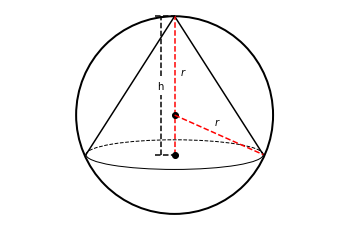

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

B1 = patches.Arc((0, -0.4), 1.8,0.3,theta2=180,fc='None',ls='--',color='k')
B2 = patches.Arc((0, -0.4), 1.8,0.3,theta1=180,fc='None',color='k')
C = patches.Circle((0, 0), 1,fc='None',lw=2,color='k');
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C)

plt.plot([0.9,0,-0.9],[-0.4,1,-0.4],'k')
plt.plot([0,0],[-0.4,1],'--r')
plt.plot([0,0],[-0.4,0],'ok')
plt.plot([0,0.9],[0,-0.4],'--r')
plt.plot([-0.2,0],[-0.4,-0.4],'--k')
plt.plot([-0.2,0],[1,1],'--k')
plt.plot([-0.14,-0.14],[-0.4,0.2],'--k')
plt.plot([-0.14,-0.14],[0.4,1],'--k')

plt.text(-0.18,0.26,'h')
plt.text(0.4,-0.1,'$r$')
plt.text(0.05,0.4,'$r$')

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

1. Escriba el volumen $V$ del cono como una función de la altura $h$ de éste. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*.
2. Determinar el valor de $h$ que maximiza el volumen para un radio $r=2$.
3. ¿Cuál es el volumen máximo del cono?

### 1. Fórmula de optimización de un cono: ###

$$ MAX h = 2R $$

- Se despeja el volúmen para maximizar:

$$ V = \frac{\pi r^2h}{3} $$

- Relación entre $h$ y $r$:
$$ \frac{h}{r}= \frac{r}{2R-h} $$

$$ h(2R-h) = r^2$$

- Sustituímos en $V$ para resolver $h$:
$$ V = \frac{\pi h(2R-h)h}{3}$$

$$ V = \frac{\pi (2R-h)h^2}{3}$$

$$ V = \frac{(2R\pi -\pi h)h^2}{3}$$

$$ V = \frac{2R\pi h^2 -\pi h^3}{3}$$

- El radio máximo es 2, $R = 2$

$$ V = \frac{4\pi h^2-h^3\pi}{3} $$

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sp.var("h") 

def funcionVol(h) :
    return ((4*np.pi*h**2-h**3*np.pi)/3)
            
funcionVol(h)

-1.0471975511966*h**3 + 4.18879020478639*h**2

In [4]:
df = sp.diff(funcionVol(h), h)
df

-3.14159265358979*h**2 + 8.37758040957278*h

In [5]:
pc = sp.solve(df,h)[1]
pc

2.66666666666667

$$ h = 2.67 $$

In [6]:
Vol_max = (1/3)*np.pi*(4)*pc
Vol_max

11.1701072127637

$$Vol_{max} = 11.17 u^3 $$

---
# Segundo punto. Programación lineal
Una fábrica de confitería está interesada en mezclar tres de sus marcas principales de golosinas (M1, M2, M3) para obtener tres nuevos productos (P1, P2, P3), que desea vender al precio de 4,3,2 u.m. por caja, respectivamente.
La empresa puede importar 2000 cajas de M1, 4000 de la M2 y 1000 de la M3, siendo el precio que debe pagar de 3,2 y 1 u.m. por cada tipo de caja.

El proveedor solicita que el Producto 1 (P1) contenga como mínimo el 80% de M1 y como máximo el 20% de M3. El producto 2 (P2) deberá contener como mínimo el 20% de M1 y no más del 80% de M3. El producto 3 (P3) no podrá contener más del 70% de M3.

Encuentre la combinación que le genere el **máximo** beneficio (precio de venta menos el costo).

Use las variables $x_{ij}$: Como la cantidad de la marca $i$ en el producto $j$.

1. Escriba la función objetivo a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas de $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad
\end{equation}
2. Resuelva el problema utilizando la función `linprog`. ¿Cuál es la combinación óptima para cada producto?, ¿Cuál es el beneficio que se genera?

#### 1. Identificar criterio de optimizacion:
- Maximizar beneficio

#### 2. Identificar información pertinente para función de costo:
Costos:
- $M_1$ = 3
- $M_2$ = 2
- $M_3$ = 1

Entradas:
- $P_1$ = 4
- $P_2$ = 3
- $P_3$ = 2

**Función de costo:**
$$ aP_1 + bP_2 + cP_3 - dM_1 - eM_2 - fM_3$$

#### 3. Definir variables de optimización:

- Fórmulas de productos:

$$ P_1 = x_{11} + x_{21} + x_{31} $$
$$ P_2 = x_{12} + x_{22} + x_{32} $$
$$ P_3 = x_{13} + x_{23} + x_{33} $$

**Si desarrollamos...**

$$P_1:$$
Min 80% de $M_1$ y max 20% de $M_3$.

$$ - 0.2x_{11} +´0.8x_{21} + 0.8x_{31} \leq 0 $$
$$ 0.8x_{31} - 0.2x_{21} - 0.2x_{11} \leq 0 $$


$$P_2:$$
Min 20% de $M_1$ y max 80% de $M_3$.

$$ -0.8x_{12} + 0.2x_{22} + 0.2x_{32} \leq 0 $$
$$ 0.2x_{32} - 0.8x_{22} - 0.8x_{12} \leq 0 $$


$$P_3:$$
Max 80% de $M_3$.

$$ 0.3x_{33} - 0.7x_{23} - 0.7x_{13} \leq 0 $$

- Fórmulas totales:
$$ M_1 $$

$$ 2000 = x_{11} + x_{12} + x_{13} $$

$$ M_2 $$

$$ 4000 = x_{21} + x_{22} + x_{23} $$

$$ M_3 $$

$$ 1000 = x_{31} + x_{32} + x_{33} $$


#### 4. Escribir el resto de la información con respecto a las variables:

- Simplificamos la función de costo:

$$ 4(x_{11} + x_{21} + x_{31}) + 3(x_{12} + x_{22} + x_{32}) + 2(x_{13} + x_{23} + x_{33}) - 3(x_{11} + x_{12} + x_{13}) - 2(x_{21} + x_{22} + x_{23}) - 1(x_{31} + x_{32} + x_{33}) $$

$$ x_{11} +  2x_{21} + 3x_{31} + x_{22} +2x_{32} - x_{13} + x_{33} $$
$$MAX (-x_{11} -  2x_{21} - 3x_{31} - x_{22} -2x_{32} + x_{13} - x_{33}) $$


In [4]:
import scipy.optimize as opt
import numpy as np

c = np.array([-1,
              -2,
              -3,
              0,
              -1,
              -2,
              1,
              0,
              -1]) #constantes funcion max o min

A = np.array([
    [-0.2, 0.8, 0.8, 0, 0, 0, 0, 0, 0],
    [-0.2, -0.2, 0.8, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, -0.8, 0.2, 0.2, 0, 0, 0],
    [0, 0, 0, -0.8, -0.8, 0.2, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, -0.7, -0.7, 0.3],
    [1, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 1]
    
    
]) #matriz por restriccion (restricciones)

b = np.array([0,
              0,
              0,
              0,
              0,
              2000,
              4000,
              1000]) #totales

opt.linprog(c, A, b, method="simplex")

     con: array([], dtype=float64)
     fun: -7000.0
 message: 'Optimization terminated successfully.'
     nit: 10
   slack: array([   0.,  200.,    0., 3800.,    0.,    0.,    0.,    0.])
  status: 0
 success: True
       x: array([ 800.,  200.,    0., 1200., 3800., 1000.,    0.,    0.,    0.])

#### Solución:
- Valores de variables:

$$x_{11}= 800$$
$$x_{21}= 200$$
$$x_{31}= 0$$
$$x_{12}= 1200$$
$$x_{22}= 3800$$
$$x_{32}= 1000$$
$$x_{13}= 0$$
$$x_{23}= 0$$
$$x_{33}= 0$$

- Máxima utilidad:
$7,000.00$


---
# Tercer punto. Ajuste de curvas
Los siguientes datos extraidos de la Federal Reserve Economic Data (FRED), son los salarios por empleado equivalente a tiempo completo en industrias privadas de EE.UU.: fondos, fideicomisos, etc. **entre los años 1998 y 2018**. 

https://www.quandl.com/data/FRED/N4461C0A052NBEA-Wage-and-salary-accruals-per-full-time-equivalent-employee-Domestic-private-industries-Funds-trusts-and-other-financial-vehicles 

In [10]:
import numpy as np
y=np.array([ 55887.,  59365.,  65435.,  68065.,  71918.,  77257.,  92036.,
        92645.,  99857.,  74935.,  78597.,  83134.,  87372., 104196.,
       112597., 133821., 129107., 138259., 139083., 143762., 147334.])
x=np.arange(8,29)

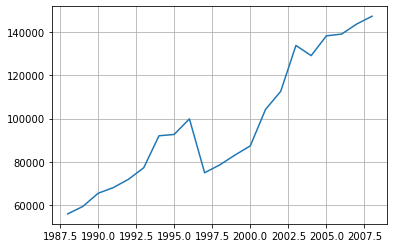

In [11]:
plt.plot(x+1980,y)
plt.grid()

1. Ajuste los salarios con polinomios de grado 1 a 3 y muestre los errores de forma gráfica, ¿Qué polinómio se ajusta mejor?
2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste
3. Use el modelo para averiguar el salario a mediados del año 2005 y para predecirlo en el año 2025. ¿Qué diferencias encuentra en cuanto a la interpolación (esto es, obtener un punto medio) y la extrapolación  (es decir, obtener un dato fuera del rango conocido)?

In [12]:
def funcion_sal(beta,X,y):
    m, n = X.shape
    beta = np.reshape(beta, [n,-1])
    pred = X @ beta
    sal = (y - pred).T @ (y - pred)
    return sal [0][0]

In [13]:
m = len(y)
ones = np.ones([m,1])
x1 = np.reshape(list(x),[m,-1])
x2 = np.reshape(x**2,[m,-1])
x3 = np.reshape(x**3,[m,-1])

# matrices de variables x
MatX1 = np.hstack((ones,x1))
MatX2 = np.hstack((ones,x1,x2))
MatX3 = np.hstack((ones,x1,x2,x3))

# BETA 
beta1 = np.random.rand(2)
beta2 = np.random.rand(3)
beta3 = np.random.rand(4)

y = np.reshape(y,[m,-1])
y

array([[ 55887.],
       [ 59365.],
       [ 65435.],
       [ 68065.],
       [ 71918.],
       [ 77257.],
       [ 92036.],
       [ 92645.],
       [ 99857.],
       [ 74935.],
       [ 78597.],
       [ 83134.],
       [ 87372.],
       [104196.],
       [112597.],
       [133821.],
       [129107.],
       [138259.],
       [139083.],
       [143762.],
       [147334.]])

In [14]:
import scipy.optimize as opt

sol1 = opt.minimize(funcion_sal,beta1,args=(MatX1,y))
sol2 = opt.minimize(funcion_sal,beta2,args=(MatX2,y))
sol3 = opt.minimize(funcion_sal,beta3,args=(MatX3,y))
sol1

      fun: 2247933171.8715076
 hess_inv: array([[ 0.23425301, -0.01169141],
       [-0.01169141,  0.00064953]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 5
     njev: 12
   status: 0
  success: True
        x: array([16474.62110952,  4520.35484397])

In [15]:
sol2

      fun: 1818616350.782032
 hess_inv: array([[ 2.09454376e+00, -2.44803867e-01,  6.47583528e-03],
       [-2.44803867e-01,  2.98578760e-02, -8.11352475e-04],
       [ 6.47583528e-03, -8.11352475e-04,  2.25364779e-05]])
      jac: array([ 0.,  0., 32.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 184
      nit: 8
     njev: 43
   status: 2
  success: False
        x: array([56220.67658429,  -459.45749337,   138.32864978])

In [16]:
sol3

      fun: 1746809632.599916
 hess_inv: array([[ 1.41474869e-02, -1.56225369e-02,  1.47507320e-03,
        -3.45489144e-05],
       [-1.56225369e-02,  1.72575104e-02, -1.63497775e-03,
         3.83907214e-05],
       [ 1.47507320e-03, -1.63497775e-03,  1.59904792e-04,
        -3.84181144e-06],
       [-3.45489144e-05,  3.83907214e-05, -3.84181144e-06,
         9.39995055e-08]])
      jac: array([   0.,    0.,  -64., -672.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 346
      nit: 10
     njev: 67
   status: 2
  success: False
        x: array([6313.23626432, 9271.93956437, -441.57504391,   10.73915999])

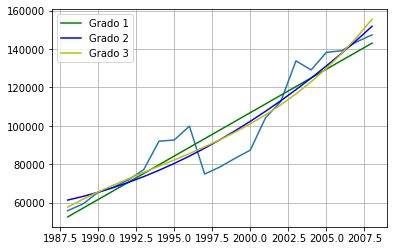

In [17]:
y_pred1 = MatX1 @ sol1.x
y_pred2 = MatX2 @ sol2.x
y_pred3 = MatX3 @ sol3.x

plt.figure()
plt.plot(x+1980,y)
plt.plot(x+1980,y_pred1,"g", label = "Grado 1")
plt.plot(x+1980,y_pred2,"b", label = "Grado 2")
plt.plot(x+1980,y_pred3,"y", label = "Grado 3")

plt.legend()
plt.grid()

- El polinomio que se ajusta mejor es el del grado 1 ya que el grado 2 y 3 asumen que va a haber un crecimiento más agresivo por lo que podría parecer que están "sobre-ajustadas".


In [18]:
x

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28])

### valor en 2005 ###

In [19]:
import sympy as sp
sp.var("x")
y1 = sol1.x[0] + sol1.x[1]*x
x_2005 = 2005.5 - 1980
x_2005

25.5

In [20]:
sal2005 = y1.subs(x,x_2005)
sal2005

131743.669630694

### Valor en 2025 ###

In [21]:
x_2025 = 2025 - 1980
x_2025

45

In [22]:
sal2025 = y1.subs(x,x_2025)
sal2025

219890.589088059

### Conclusiones ###
- El problema entre extrapolar y predecir datos es que por más preciso que sea el modelo no se puede estar seguro del valor en tal tiempo "x".